In [1]:
import data
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
from main import initiate_models
import data

import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

/Volumes/Secomba/beekm/Boxcryptor/iCloud/Opleiding/MSc Computational Science/Thesis Alicante/Code/Feedback model/visualization.py:13: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('TkAgg')
/Volumes/Secomba/beekm/Boxcryptor/iCloud/Opleiding/MSc Computational Science/Thesis Alicante/Code/Feedback model/main.py:13: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('TkAgg')


In [2]:
# set-up models
params_model, _ = data.get_params()
models = initiate_models(params_model)

BR_eff, RL_eff, BR_ave, RL_ave = [], [], [], []
for t in data.daterange():
    print(t)
    for model in models:
        model.step()
        # Collect effective biomasses for every measurement time
    if t in data.measurements:
        BR, RL, BR_std, RL_std = [], [], [], []
        for model in models:
            for patch in model.patches:
                # Only look at mixed patches
                if 'M' in patch.id:
                    BR += [cell.BR_eff for cell in patch.BR_original + patch.RL]
                    RL += [cell.RL_eff for cell in patch.BR_original + patch.RL]
                    BR_std += [cell.biomass for cell in patch.BR_original]
                    RL_std += [cell.biomass for cell in patch.RL]

        BR_eff.append(np.nanmean(BR))
        RL_eff.append(np.nanmean(RL))
        BR_ave.append(np.nanmean(BR_std))
        RL_ave.append(np.nanmean(RL_std))

2017-03-08 00:00:00
2017-03-09 00:00:00
2017-03-10 00:00:00
2017-03-11 00:00:00
2017-03-12 00:00:00
2017-03-13 00:00:00
2017-03-14 00:00:00
2017-03-15 00:00:00
2017-03-16 00:00:00
2017-03-17 00:00:00
2017-03-18 00:00:00
2017-03-19 00:00:00
2017-03-20 00:00:00
2017-03-21 00:00:00
2017-03-22 00:00:00
2017-03-23 00:00:00
2017-03-24 00:00:00
2017-03-25 00:00:00
2017-03-26 00:00:00
2017-03-27 00:00:00
2017-03-28 00:00:00
2017-03-29 00:00:00
2017-03-30 00:00:00
2017-03-31 00:00:00
2017-04-01 00:00:00
2017-04-02 00:00:00
2017-04-03 00:00:00
2017-04-04 00:00:00
2017-04-05 00:00:00
2017-04-06 00:00:00
2017-04-07 00:00:00
2017-04-08 00:00:00
2017-04-09 00:00:00
2017-04-10 00:00:00
2017-04-11 00:00:00
2017-04-12 00:00:00
2017-04-13 00:00:00
2017-04-14 00:00:00
2017-04-15 00:00:00
2017-04-16 00:00:00
2017-04-17 00:00:00
2017-04-18 00:00:00
2017-04-19 00:00:00
2017-04-20 00:00:00
2017-04-21 00:00:00
2017-04-22 00:00:00
2017-04-23 00:00:00
2017-04-24 00:00:00
2017-04-25 00:00:00
2017-04-26 00:00:00


2018-04-22 00:00:00
2018-04-23 00:00:00
2018-04-24 00:00:00
2018-04-25 00:00:00
2018-04-26 00:00:00
2018-04-27 00:00:00
2018-04-28 00:00:00
2018-04-29 00:00:00
2018-04-30 00:00:00
2018-05-01 00:00:00
2018-05-02 00:00:00
2018-05-03 00:00:00
2018-05-04 00:00:00
2018-05-05 00:00:00
2018-05-06 00:00:00
2018-05-07 00:00:00
2018-05-08 00:00:00
2018-05-09 00:00:00
2018-05-10 00:00:00
2018-05-11 00:00:00
2018-05-12 00:00:00
2018-05-13 00:00:00
2018-05-14 00:00:00
2018-05-15 00:00:00
2018-05-16 00:00:00
2018-05-17 00:00:00
2018-05-18 00:00:00
2018-05-19 00:00:00
2018-05-20 00:00:00
2018-05-21 00:00:00
2018-05-22 00:00:00
2018-05-23 00:00:00
2018-05-24 00:00:00


In [10]:
BR_fact = np.mean(np.array(BR_eff) / np.array(BR_ave))
RL_fact = np.mean(np.array(RL_eff) / np.array(RL_ave))
print(BR_fact, RL_fact)

0.18569556730623607 0.001990909748819857


In [40]:
fname = "../data/params.csv"
df = pd.read_csv(fname, delimiter=',', decimal='.')
df["c_rb"] = df.ix[:,"c_rb (x0.1)"] * 10
param_data = df.ix[:,["alpha", "beta", "gamma", "c_bb", "c_rr", "c_br", "c_rb"]].values
print(param_data)

RL_data = [0.70457249, 0.77588911, 0.76355914, 1.30293728, 1.91176715]
BR_data = [0.2171,     0.29796294, 0.34574113, 0.41227482, 0.46071135]
# RL_data = [0.21575459415247367, 0.1177704944291379, 0.08803181733254112, 0.06908942170115166, 0.06884502657104187]  
# BR_data = [0.007880892937875184, 0.00919545028258437, 0.011973686058667386, 0.0212939005602953, 0.025690571025854463] 

R_max = max(RL_data) * 2
B_max = max(BR_data) * 2

[[ 35.   15.    3.    4.5  50.    0.  120. ]
 [ 15.   10.    2.    4.5  45.    5.   80. ]
 [ 15.   32.    3.5   4.5   5.   10.   90. ]]


/Users/beekm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
def get_LV_params(c_rb = None, c_br = None, p = None):
    if not p:
        p, _ = data.get_params()
    if not c_rb:
        c_rb = p['c_rb']
    if not c_br:
        c_br = p['c_br']
    c_rr, c_bb = p['c_rr'], p['c_bb']
    c_br *= RL_fact
    c_rr *= RL_fact
    c_rb *= BR_fact
    c_bb *= BR_fact
    
    LV_K_R = p['R_K'] / (1 - c_rr * p['R_K'])
    LV_K_B = p['B_K'] / (1 - c_bb * p['B_K'])
    LV_c_rb = c_rb * LV_K_R
    LV_c_br = c_br * LV_K_B
    r_R, r_B = p['R_g'], p['B_g']
    
    return LV_K_R, LV_K_B, LV_c_rb, LV_c_br, r_R, r_B

In [46]:
def get_eigenvalues(B_R, B_B, params):
        K_R, K_B, c_rb, c_br, r_R, r_B = params
        K_R = 10
        
        A = r_R / K_R * (K_R - 2*B_R - c_rb*B_B)
        B = -r_R * c_rb * B_R / K_R
        C = -r_B * c_br * B_B / K_B
        D = r_B / K_B * (K_B - 2*B_B - c_br*B_R)
        
        r = 0.5 * (A + D)
        i = 0.5 * np.sqrt((A + D)**2 - 4*(A*D - C*B))
        
        return r + i, r - i

In [47]:
def get_stable_point():
    K_R, K_B, c_rb, c_br, r_R, r_B = params
    B_R = (K_R - c_rb*K_B)/(1 - c_rb*c_br)
    B_B = (K_B - c_br*K_R)/(1 - c_br*c_rb)
    
    return B_R, B_B

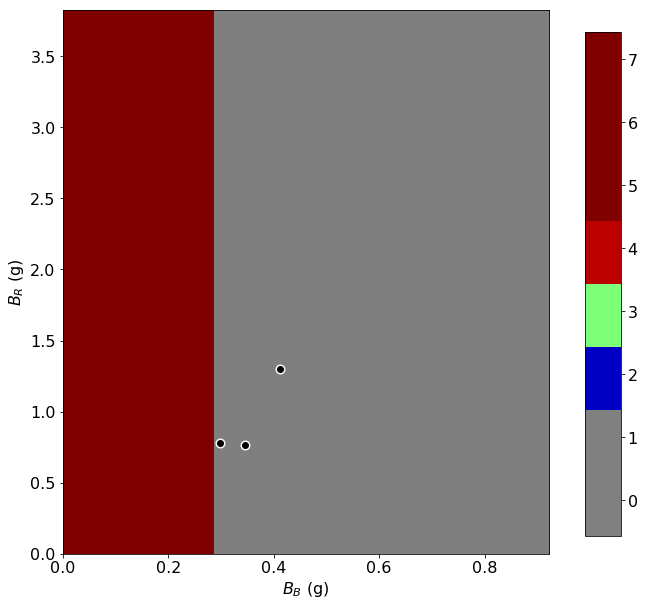

In [55]:
N = 1000
Rs = np.linspace(0, R_max, N)
Bs = np.linspace(0, B_max, N)

# define custom colormap
bounds = np.linspace(-0.1,7,9)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5,.5,.5,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

fig, axes = plt.subplots(nrows=1, ncols=1)
x, y = [], []
for t in range(3):
    im = np.zeros((N, N))
    p, _ = data.get_params()
    params = get_LV_params(p=p)
        
    for i, j in product(range(N), repeat=2):
        B_R, B_B = Rs[i], Bs[j]
        K_R, K_B, c_rb, c_br, _, _ = params
        if B_R > .5*(K_R - c_rb*B_B):
            im[i, j] = 1
        if B_B > .5*(K_B - c_br*B_R):
            im[i, j] += 2
        if (K_R - 2*B_R - c_rb*B_B)*(K_B - 2*B_B - c_br*B_R) > c_br*c_rb*B_B*B_R:
            im[i, j] += 4
    
    x.append(BR_data[t+1])
    y.append(RL_data[t+1])
    
ax = axes
plot = ax.imshow(im, extent=[0,B_max,0,R_max], cmap=cmap, aspect='auto', origin='lower')
ax.scatter(x, y, c='w', s=80)
ax.scatter(x, y, c='k')
ax.set_xlabel(r'$B_B$ (g)')
ax.set_ylabel(r'$B_R$ (g)')
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plot, cax=cbar_ax, cmap=cmap, spacing='proportional', ticks=bounds+0.5, boundaries=bounds, format='%.0f')

fname = "../results/equilibrium.jpg"

plt.savefig(fname)
plt.show()

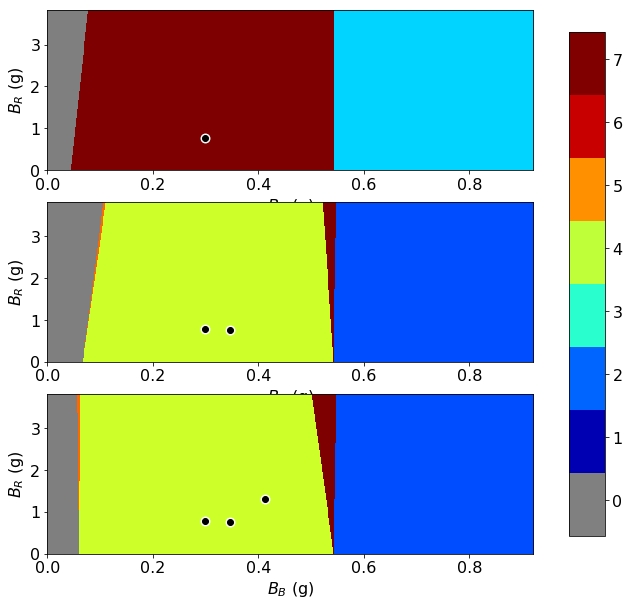

In [56]:
N = 1000
Rs = np.linspace(0, R_max, N)
Bs = np.linspace(0, B_max, N)

# define custom colormap
bounds = np.linspace(-0.1,7,9)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5,.5,.5,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

fig, axes = plt.subplots(nrows=3, ncols=1)
x, y = [], []
for t in range(3):
    im = np.zeros((N, N))
    p, _ = data.get_params()
    for i, param in enumerate(["alpha", "beta", "gamma", "c_bb", "c_rr", "c_br", "c_rb"]):
        p[param] = param_data[t,i]
    params = get_LV_params(p=p)
        
    for i, j in product(range(N), repeat=2):
        B_R, B_B = Rs[i], Bs[j]
        K_R, K_B, c_rb, c_br, _, _ = params
        if B_R > .5*(K_R - c_rb*B_B):
            im[i, j] = 1
        if B_B > .5*(K_B - c_br*B_R):
            im[i, j] += 2
        if (K_R - 2*B_R - c_rb*B_B)*(K_B - 2*B_B - c_br*B_R) > c_br*c_rb*B_B*B_R:
            im[i, j] += 4
    
    ax = axes.flat[t]
    plot = ax.imshow(im, extent=[0,B_max,0,R_max], cmap=cmap, aspect='auto', origin='lower')
    x.append(BR_data[t+1])
    y.append(RL_data[t+1])
    ax.scatter(x, y, c='w', s=80)
    ax.scatter(x, y, c='k')
    ax.set_xlabel(r'$B_B$ (g)')
    ax.set_ylabel(r'$B_R$ (g)')
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(plot, cax=cbar_ax, cmap=cmap, spacing='proportional', ticks=bounds+0.5, boundaries=bounds, format='%.0f')

fname = "../results/equilibrium.jpg"

plt.savefig(fname)
plt.show()